In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Product Price')
    plt.plot(predicted, color='blue',label='Predicted Product Price')
    plt.title('Hipernet Product Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Hipernet Product Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rms = np.sqrt(((predicted - test) ** 2).mean())
    print("The root mean squared error is {}.".format(rms))

def mean_absolute_percentage_error(test, predicted): 
    y_true, y_pred = np.array(test), np.array(predicted)
    print("The MAPE is {}.".format(np.mean(np.abs((y_true - y_pred) / y_true)) * 100))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/dataset/hipernet.csv', index_col='Date', parse_dates=['Date'])
dataset

,Price
Date,
2016-01-01,10.53
2016-01-01,10.53
2016-01-01,10.53
2016-01-01,14.03
2016-01-01,10.53
...,...
2018-12-29,84.20
2018-12-29,84.20
2018-12-29,84.20


In [ ]:
training_set = dataset[:'2017'].iloc[:,0:1].values
test_set = dataset['2018':].iloc[:,0:1].values

In [ ]:
pd.DataFrame(training_set).to_csv("training_set.csv")

In [ ]:
pd.DataFrame(test_set).to_csv("test_set.csv")

In [ ]:
test_set

array([[126.31],
       [126.31],
       [126.31],
       [126.31],
       [140.34],
       [140.34],
       [140.34],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [210.51],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [175.43],
       [210.51],
       [210.51],
       [245.6 ],
       [245.6 ],
       [210.51],
       [210.51],
       [210.51],
       [245.6 ],
       [245.6 ],
       [210.51],
       [210.51],
       [245.6 ],
       [245.6 ],
       [245.6 ],
       [245.6 ],
       [245.6 ],
       [245.6 ],
       [245.6 ],
       [245.6 ],
       [210.51],
       [210.51],
       [210.51],
       [210.51],
       [210.51],
       [210.51],
       [210.51],
       [245.6 ],
       [245.6 

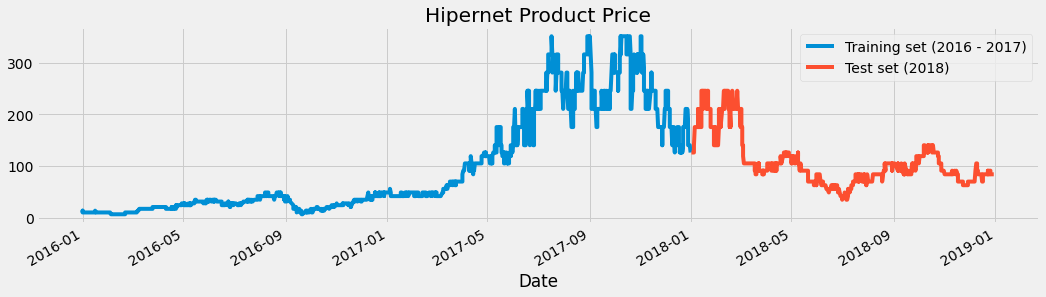

In [ ]:
dataset["Price"][:'2017'].plot(figsize=(16,4),legend=True)
dataset["Price"]['2018':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (2016 - 2017)','Test set (2018)'])
plt.title('Hipernet Product Price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
pd.DataFrame(training_set_scaled).to_csv("training_set_scaled.csv")

In [ ]:
X_train = []
y_train = []
for i in range(60,2036):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train

array([[0.01020853, 0.01020853, 0.01020853, ..., 0.01020853, 0.01020853,
        0.01020853],
       [0.01020853, 0.01020853, 0.02038798, ..., 0.01020853, 0.01020853,
        0.01020853],
       [0.01020853, 0.02038798, 0.01020853, ..., 0.01020853, 0.01020853,
        0.01020853],
       ...,
       [0.38774976, 0.38774976, 0.38774976, ..., 0.38774976, 0.38774976,
        0.38774976],
       [0.38774976, 0.38774976, 0.38774976, ..., 0.38774976, 0.38774976,
        0.38774976],
       [0.38774976, 0.38774976, 0.38774976, ..., 0.38774976, 0.38774976,
        0.34694471]])

In [ ]:
y_train

array([0.01020853, 0.01020853, 0.01020853, ..., 0.38774976, 0.34694471,
       0.34694471])

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train.shape

(1976, 60, 1)

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=75, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=75, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=75, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer)
regressor.add(LSTM(units=75))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(units=1))
# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
start = time.time()
regressor.fit(X_train,y_train,epochs=150,batch_size=32)
end = time.time()

Epoch 1/150
62/62 [==============================] - 16s 70ms/step - loss: 0.0302
Epoch 2/150
62/62 [==============================] - 4s 70ms/step - loss: 0.0102
Epoch 3/150
62/62 [==============================] - 4s 70ms/step - loss: 0.0092
Epoch 4/150
62/62 [==============================] - 4s 70ms/step - loss: 0.0072
Epoch 5/150
62/62 [==============================] - 4s 70ms/step - loss: 0.0062
Epoch 6/150
62/62 [==============================] - 4s 70ms/step - loss: 0.0059
Epoch 7/150
62/62 [==============================] - 4s 70ms/step - loss: 0.0048
Epoch 8/150
62/62 [==============================] - 4s 70ms/step - loss: 0.0050
Epoch 9/150
62/62 [==============================] - 4s 70ms/step - loss: 0.0049
Epoch 10/150
62/62 [==============================] - 4s 70ms/step - loss: 0.0047
Epoch 11/150
62/62 [==============================] - 4s 69ms/step - loss: 0.0042
Epoch 12/150
62/62 [==============================] - 4s 69ms/step - loss: 0.0039
Epoch 13/150
62/62 [====

In [ ]:
#regressor = keras.models.load_model(r'/content/drive/MyDrive/Model/model.h5')

In [ ]:
print(end-start)

688.4119300842285


In [ ]:
dataset_total = pd.concat((dataset["Price"][:'2017'],dataset["Price"]['2018':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
inputs

array([[0.38774976],
       [0.38774976],
       [0.48980601],
       ...,
       [0.2244714 ],
       [0.2244714 ],
       [0.2244714 ]])

In [ ]:
X_test = []
for i in range(60,1044):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = predicted_stock_price.round(2)

In [ ]:
X_test.shape

(984, 60, 1)

In [ ]:
bb  = sc.transform(predicted_stock_price)

In [ ]:
pd.DataFrame(bb).to_csv("predicted_stock_pricenorm.csv")

In [ ]:
X_test

array([[[0.38774976],
        [0.38774976],
        [0.48980601],
        ...,
        [0.38774976],
        [0.34694471],
        [0.34694471]],

       [[0.38774976],
        [0.48980601],
        [0.48980601],
        ...,
        [0.34694471],
        [0.34694471],
        [0.34694471]],

       [[0.48980601],
        [0.48980601],
        [0.48980601],
        ...,
        [0.34694471],
        [0.34694471],
        [0.34694471]],

       ...,

       [[0.18366635],
        [0.18366635],
        [0.18366635],
        ...,
        [0.2244714 ],
        [0.2244714 ],
        [0.2244714 ]],

       [[0.18366635],
        [0.18366635],
        [0.18366635],
        ...,
        [0.2244714 ],
        [0.2244714 ],
        [0.2244714 ]],

       [[0.18366635],
        [0.18366635],
        [0.18366635],
        ...,
        [0.2244714 ],
        [0.2244714 ],
        [0.2244714 ]]])

In [ ]:
pd.DataFrame(inputs).to_csv("inputs.csv")

In [ ]:
predicted_stock_price

array([[123.67],
       [123.36],
       [123.85],
       [123.87],
       [123.65],
       [133.15],
       [137.32],
       [137.17],
       [162.77],
       [172.95],
       [171.19],
       [169.27],
       [169.43],
       [170.16],
       [170.49],
       [170.53],
       [170.56],
       [170.62],
       [170.67],
       [170.69],
       [170.68],
       [170.65],
       [198.93],
       [179.28],
       [168.8 ],
       [168.66],
       [171.04],
       [171.55],
       [171.06],
       [170.72],
       [170.65],
       [170.63],
       [198.88],
       [207.88],
       [234.17],
       [240.58],
       [210.24],
       [201.69],
       [205.54],
       [237.44],
       [244.24],
       [211.69],
       [202.14],
       [235.11],
       [245.48],
       [241.58],
       [239.47],
       [241.  ],
       [242.34],
       [242.49],
       [242.32],
       [213.06],
       [204.7 ],
       [206.95],
       [208.05],
       [206.54],
       [205.12],
       [204.56],
       [233.67

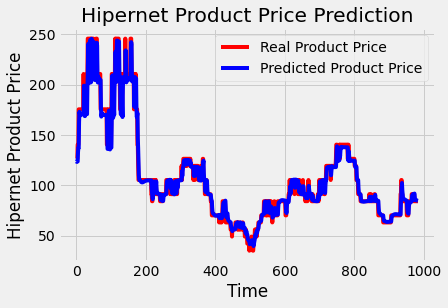

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 8.74630555432289.


In [ ]:
mean_absolute_percentage_error(test_set,predicted_stock_price)

The MAPE is 4.167081551721844.


In [ ]:
regressor.save(r'/content/drive/MyDrive/Model/model.h5')
regressor.save_weights(r'/content/drive/MyDrive/Model/weight.h5')

In [ ]:
test_set = np.array(test_set)
pd.DataFrame(test_set).to_csv("test.csv")

In [ ]:
predicted_stock_price = np.array(predicted_stock_price)
pd.DataFrame(predicted_stock_price).to_csv("predicted.csv")

In [ ]:
units=int(int(regressor.layers[0].trainable_weights[0].shape[1])/4)

In [ ]:
W=regressor.layers[0].get_weights()[0]
b=regressor.layers[0].get_weights()[2]

In [ ]:
W_i = W[:, :units]
W_f = W[:, units: units * 2]
W_c = W[:, units * 2: units * 3]
W_o = W[:, units * 3:]

In [ ]:
W_i[0]

array([ 2.00509597e-02,  8.29373151e-02,  1.84656978e-01,  2.15097591e-01,
       -3.26986313e-02,  1.77076533e-02,  4.31470811e-01,  1.90058306e-01,
        1.71543494e-01,  1.86499774e-01,  4.32703465e-01,  3.39673460e-01,
        8.96892995e-02, -4.49949093e-02,  3.08899164e-01,  2.15727121e-01,
        2.62142479e-01,  1.67507976e-01,  2.03932613e-01,  9.48987454e-02,
        2.04652864e-02,  3.63530517e-01, -2.79316271e-04,  2.19077379e-01,
        2.00277820e-01,  2.49504805e-01, -1.80505529e-01, -1.62786305e-01,
        1.20426305e-01,  3.84285748e-02, -6.62707031e-01, -1.20529383e-02,
        3.77152771e-01,  1.03720725e-02, -1.39583990e-01,  3.60324591e-01,
       -2.91503407e-02,  5.20023964e-02, -4.11881506e-01,  2.12837700e-02,
        2.62691498e-01,  2.87719667e-01,  2.44714618e-01,  2.04672173e-01,
        5.52851737e-01,  1.88564032e-01,  4.46636021e-01,  1.56248406e-01,
        5.35196140e-02, -1.65408701e-01,  2.11664811e-01, -5.91930747e-02,
        2.38624796e-01,  

In [ ]:
W_f[0]

array([-0.20628771, -0.0636055 , -0.13161081, -0.15632892, -0.237748  ,
       -0.11613084, -0.00416398, -0.30102566,  0.03528667, -0.2124414 ,
       -0.265547  , -0.2417903 , -0.1058083 , -0.1462797 , -0.14379914,
       -0.03788958, -0.06465475, -0.02810799, -0.35093102, -0.05415958,
       -0.07542912, -0.07886591, -0.35127956, -0.22968973, -0.02930112,
       -0.13425006, -0.00160764,  0.03211135, -0.01428666,  0.0215171 ,
       -0.60072786, -0.14620915, -0.14830673, -0.05168821, -0.388578  ,
       -0.13802332, -0.21248521, -0.0900391 , -0.1798204 , -0.12323603,
       -0.2363899 , -0.21887092, -0.211022  ,  0.00136298, -0.10111849,
       -0.1585337 , -0.2127507 , -0.17822081, -0.00751757,  0.02553983,
       -0.08422799, -0.10743503, -0.23548941,  0.02814748, -0.09944171,
       -0.30483133, -0.04680603, -0.11352985, -0.41815948, -0.13978645,
       -0.09127986,  0.02763769, -0.246414  , -0.06971449,  0.02122694,
       -0.11499988, -0.02357249, -0.22453104, -0.17938296, -0.10

In [ ]:
W_c[0]

array([-0.16414887,  0.03685544, -0.19781873, -0.16776106,  0.17421558,
        0.15558942,  0.17535587,  0.144792  , -0.10813073, -0.15517466,
        0.16686842, -0.16980754,  0.06490168,  0.18670374, -0.16038188,
       -0.13367459, -0.15845956,  0.11398873, -0.16151679,  0.16140744,
       -0.13882272, -0.17842947, -0.13508865,  0.16436145, -0.18937029,
        0.16426586,  0.17879224, -0.062838  ,  0.19188905, -0.17139679,
        0.01367145, -0.16265935,  0.16147444, -0.1767446 , -0.04775654,
       -0.19236939,  0.06241697,  0.13553517, -0.02489757,  0.17606774,
        0.14459008,  0.15616104,  0.14660642, -0.14516199, -0.1671415 ,
       -0.18050045, -0.17113642, -0.16769771,  0.06237894, -0.12379608,
       -0.1325018 , -0.09243918, -0.17149353,  0.18314944, -0.1813017 ,
        0.14562468,  0.1710006 ,  0.15273069, -0.12920032, -0.18384413,
       -0.18739334, -0.15687576, -0.16579288, -0.18413451, -0.17247412,
        0.13204043, -0.18200868,  0.1247748 , -0.16708164, -0.15

In [ ]:
W_o[0]

array([ 0.12274112,  0.02289293,  0.34444395,  0.45657787,  0.08175288,
       -0.02942522,  0.4651002 ,  0.12511498,  0.18372022,  0.2745937 ,
        0.37940314,  0.38681713, -0.09468579,  0.14984769,  0.31844687,
        0.08752169,  0.20312081,  0.31827787,  0.17220679,  0.05745588,
        0.06611636,  0.33904544, -0.03469716,  0.28517842,  0.23366748,
        0.13721773,  0.01193319, -0.15486924,  0.04711863,  0.15709576,
       -0.52682287,  0.17880741,  0.2742237 ,  0.15856452, -0.26379937,
        0.3329685 ,  0.0690515 ,  0.06668033, -0.30194476,  0.04419773,
        0.2948818 ,  0.26235428,  0.15550673,  0.06394704,  0.3896462 ,
        0.32213986,  0.32696554,  0.1730954 ,  0.07522827, -0.19114578,
        0.16064923, -0.02477215,  0.06491657,  0.06767467,  0.20789239,
        0.20869471,  0.34680244,  0.39071286, -0.14783828,  0.23817804,
        0.1665556 ,  0.42190108,  0.37144968,  0.32346287,  0.2136887 ,
        0.30088684,  0.22316648,  0.17269133,  0.2343827 ,  0.11

In [ ]:
b_i = b[:units]
b_f = b[units: units * 2]
b_c = b[units * 2: units * 3]
b_o = b[units * 3:]

In [ ]:
b_i

array([-0.05971058, -0.16612308,  0.14413704,  0.36656305,  0.03390881,
       -0.12334284,  0.16569635,  0.12887694, -0.05976889,  0.06590998,
        0.40231118,  0.1688963 , -0.10586045, -0.00600141,  0.1803923 ,
        0.02677718,  0.07356779, -0.05003884,  0.21533187, -0.06818107,
       -0.05372905,  0.40287504,  0.03874872,  0.39182878,  0.18299925,
        0.18736798, -0.07541335, -0.17744517,  0.00259522, -0.00820903,
       -0.8867251 , -0.02824582,  0.3131634 ,  0.05429842, -0.16263649,
        0.33104107, -0.08778521, -0.03071659, -0.15321566, -0.05940535,
        0.27538654,  0.10430537,  0.08091741, -0.07351383,  0.4457998 ,
        0.15544268,  0.33418384,  0.21902838, -0.15337822, -0.12220901,
       -0.00387162, -0.15282202,  0.05678932, -0.05967977,  0.0403019 ,
        0.09931647,  0.04663676,  0.38268077, -0.10095859,  0.32213455,
        0.19537096,  0.15128271,  0.3339169 ,  0.19516858, -0.00669555,
        0.13067003,  0.16794014, -0.0865702 ,  0.12808144,  0.14

In [ ]:
b_f

array([0.77600086, 0.76984346, 0.8585707 , 0.6057869 , 0.7586262 ,
       0.81557024, 0.7097523 , 0.581465  , 0.63649833, 0.60616875,
       0.59054846, 0.6597217 , 0.60520184, 0.84601927, 0.65993   ,
       0.6162856 , 0.72763544, 0.6099614 , 0.49930272, 0.75319153,
       0.7231679 , 0.673359  , 0.6178631 , 0.5573095 , 0.79786986,
       0.65268   , 0.8605299 , 0.82989126, 0.83177507, 0.7854734 ,
       0.10572453, 0.78370994, 0.70067036, 0.7529308 , 0.6840069 ,
       0.7805623 , 0.76942205, 0.6291195 , 0.86769265, 0.8468718 ,
       0.52586657, 0.56264937, 0.60149944, 0.790382  , 0.60442996,
       0.7641245 , 0.6206403 , 0.5919357 , 0.68584126, 0.8385322 ,
       0.6499163 , 0.80021524, 0.7501572 , 0.8326038 , 0.77687377,
       0.65903926, 0.61590296, 0.54931283, 0.4312113 , 0.8058798 ,
       0.72371405, 0.6062336 , 0.5893494 , 0.73645043, 0.8302222 ,
       0.54460096, 0.7718452 , 0.6432403 , 0.7271208 , 0.6340446 ,
       0.7569486 , 0.5913001 , 0.48065385, 0.64955854, 0.60296

In [ ]:
b_c

array([ 0.06459323, -0.01704486,  0.07506883,  0.06087664, -0.06433885,
       -0.05046407, -0.0555716 , -0.05777047,  0.0435963 ,  0.04938559,
       -0.06495032,  0.05501535, -0.02452102, -0.0687153 ,  0.05824051,
        0.05046692,  0.05056253, -0.0479432 ,  0.05656605, -0.06557667,
        0.0564176 ,  0.06206639,  0.05196841, -0.06972186,  0.06585614,
       -0.06500224, -0.05998131,  0.02736177, -0.06948586,  0.05724222,
       -0.00631469,  0.07488812, -0.05914304,  0.07148762, -0.01434829,
        0.07304966, -0.03532318, -0.05749907,  0.0442112 , -0.06132117,
       -0.05928136, -0.06011367, -0.06058443,  0.0620796 ,  0.06563759,
        0.06590015,  0.06241386,  0.05917647, -0.02464329,  0.04799297,
        0.04003191,  0.03157671,  0.0746046 , -0.07186225,  0.06805194,
       -0.06506416, -0.05461593, -0.05572242,  0.05308799,  0.06543259,
        0.06529413,  0.04996638,  0.05892245,  0.06727432,  0.06665171,
       -0.05876702,  0.07513856, -0.0434118 ,  0.05188615,  0.05

In [ ]:
b_o

array([-6.52703196e-02, -1.67367637e-01,  1.33695319e-01,  3.56721669e-01,
        2.81989463e-02, -1.24592438e-01,  1.41475886e-01,  1.24750033e-01,
       -7.56562278e-02,  5.70384040e-02,  3.95559579e-01,  1.62323058e-01,
       -1.04833782e-01, -1.22849168e-02,  1.70534208e-01,  2.23774575e-02,
        6.68259189e-02, -8.18742439e-02,  2.10156053e-01, -7.05091059e-02,
       -5.66335917e-02,  3.98859769e-01,  3.87735255e-02,  3.95457000e-01,
        1.79761663e-01,  1.82481751e-01, -7.68171921e-02, -1.86354741e-01,
        6.83657185e-04, -2.21507456e-02, -8.91760647e-01, -4.42037955e-02,
        3.12074542e-01,  4.30971943e-02, -1.64436206e-01,  3.32291424e-01,
       -9.34578776e-02, -3.60744745e-02, -1.53243691e-01, -6.18643761e-02,
        2.70370454e-01,  9.65288430e-02,  7.55140483e-02, -8.20380747e-02,
        4.43054378e-01,  1.34045094e-01,  3.33541960e-01,  2.18580574e-01,
       -1.64481491e-01, -1.28640398e-01, -5.13487868e-03, -1.55113816e-01,
        6.17833883e-02, -